# Importing required packages

In [1]:
import torch
import uuid
import cv2
import os
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
images_path = os.path.join('data','images')
labels_path = os.path.join('data','labels')
labels = ['thumbs_up','thumbs_down']
num_imgs = 30

# Collecting Images

In [3]:
cap = cv2.VideoCapture(0)
for label in labels:
    print('collecting images for {}'.format(label))
    time.sleep(5)
    
    for img_num in range(num_imgs):
        print('collecting images for {},image num {}' .format(label,img_num))
        
        ret,frame = cap.read()
        
        img_name = os.path.join(images_path,label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(img_name,frame)
        cv2.imshow('IMG Collection',frame)
        time.sleep(3)
        
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
        
cap.release()
cv2.destroyAllWindows()

collecting images for thumbs_up
collecting images for thumbs_up,image num 0
collecting images for thumbs_up,image num 1
collecting images for thumbs_up,image num 2
collecting images for thumbs_up,image num 3
collecting images for thumbs_up,image num 4
collecting images for thumbs_up,image num 5
collecting images for thumbs_up,image num 6
collecting images for thumbs_up,image num 7
collecting images for thumbs_up,image num 8
collecting images for thumbs_up,image num 9
collecting images for thumbs_up,image num 10
collecting images for thumbs_up,image num 11
collecting images for thumbs_up,image num 12
collecting images for thumbs_up,image num 13
collecting images for thumbs_up,image num 14
collecting images for thumbs_up,image num 15
collecting images for thumbs_up,image num 16
collecting images for thumbs_up,image num 17
collecting images for thumbs_up,image num 18
collecting images for thumbs_up,image num 19
collecting images for thumbs_up,image num 20
collecting images for thumbs_up,i

# Cloning the labelImg and installing required packages for annotations

In [5]:
!git clone https://github.com/heartexlabs/labelImg

Cloning into 'labelImg'...


In [6]:
!pip install pyqt5 lxml --upgrade
!cd labelImg & pyrcc5 -o libs/resources.py resources.qrc

     ---------------------------------------- 6.8/6.8 MB 3.2 MB/s eta 0:00:00
  Using cached lxml-4.9.2-cp39-cp39-win_amd64.whl (3.9 MB)
  Attempting uninstall: pyqt5
    Found existing installation: PyQt5 5.15.7
    Uninstalling PyQt5-5.15.7:
      Successfully uninstalled PyQt5-5.15.7
  Attempting uninstall: lxml
    Found existing installation: lxml 4.9.1
    Uninstalling lxml-4.9.1:
      Successfully uninstalled lxml-4.9.1


# Cloning Ultralytics yolov5 and installing all the packages listed in requirements.txt

In [ ]:
!git clone https://github.com/ultralytics/yolov5 

In [ ]:
!cd yolov5 & pip install -r requirements.txt

# Loading the model using PyTorch 

In [4]:
model = torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\prash/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-2-3 Python-3.9.15 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


# Training the model on custom data

In [11]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data custom.yml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=custom.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-72-g064365d Python-3.9.15 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0

# Loading the model trained on custom data

In [17]:
model = torch.hub.load('ultralytics/yolov5','custom',path = 'yolov5/runs/train/exp17/weights/last.pt',force_reload = True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\prash/.cache\torch\hub\master.zip
YOLOv5  2023-2-3 Python-3.9.15 torch-1.13.1 CUDA:0 (NVIDIA GeForce RTX 3060 Laptop GPU, 6144MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


# Checking the results and plotting the image using matplotlib

In [24]:
img = os.path.join('data','images','thumbs_down.5be41eb4-a373-11ed-a0ae-847b5773f522.jpg')

In [25]:
results = model(img)

In [26]:
results.print()

image 1/1: 480x640 1 thumbs_down
Speed: 19.1ms pre-process, 105.9ms inference, 2.0ms NMS per image at shape (1, 3, 480, 640)


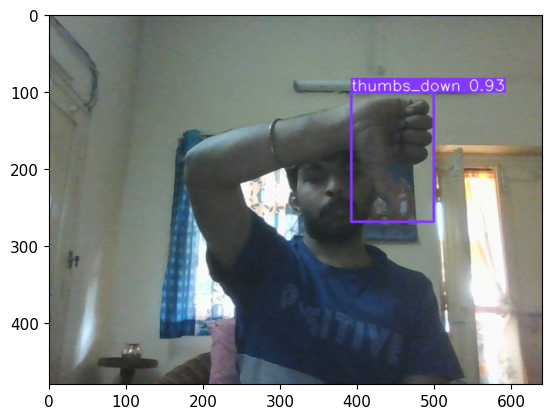

In [27]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

# Doing Real-time detections

In [23]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret,frame = cap.read()
    
    # making detections
    results = model(frame)
    
    cv2.imshow('IMG', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

# Future Improvements:
1.Collecting and annotating different images realted to sign language 
2.Data augmentation for varity in the data to make model learn on wide range of images 
3.Increasing number of epoches to increase the accuracy 
4.Trying to deploythe model 